In [1]:
import pandas as pd

data=pd.read_csv("C:\\Users\\Immortal\\OneDrive\\Desktop\\aiml\\Datasets\\heart.csv")

In [2]:
data = pd.read_csv("cardis.csv",sep=";")

In [3]:
data = data.head(70000)

In [4]:
data.shape

(68783, 12)

In [5]:
data

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [8]:
x=data.iloc[:,0:11].values
x

array([[ 50,   2, 168, ...,   0,   0,   1],
       [ 55,   1, 156, ...,   0,   0,   1],
       [ 52,   1, 165, ...,   0,   0,   0],
       ...,
       [ 52,   2, 183, ...,   0,   1,   0],
       [ 61,   1, 163, ...,   0,   0,   0],
       [ 56,   1, 170, ...,   0,   0,   1]], dtype=int64)

In [9]:
data.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [10]:
x.shape

(68783, 11)

In [12]:
y=data.iloc[:,11].values

In [183]:
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [13]:
y.shape

(68783,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st_c=StandardScaler()

In [18]:
xtrain=st_c.fit_transform(xtrain)
xtrain

array([[-0.192756  ,  1.36459821,  0.68937525, ...,  3.22888404,
         4.18845251,  0.49619886],
       [-1.67185753, -0.73281644, -0.1671764 , ..., -0.30970453,
        -0.23875166,  0.49619886],
       [ 0.99052523, -0.73281644,  0.68937525, ..., -0.30970453,
        -0.23875166,  0.49619886],
       ...,
       [-1.81976769, -0.73281644, -0.04481188, ...,  3.22888404,
        -0.23875166,  0.49619886],
       [-1.37603723,  1.36459821,  0.32228168, ..., -0.30970453,
        -0.23875166,  0.49619886],
       [-0.04484585,  1.36459821,  2.7695721 , ..., -0.30970453,
        -0.23875166,  0.49619886]])

In [19]:
xtrain.shape

(51587, 11)

In [20]:
ytrain.shape

(51587,)

In [21]:
xtest=st_c.transform(xtest)

In [22]:
xtest

array([[ 0.10306431, -0.73281644, -0.04481188, ..., -0.30970453,
        -0.23875166,  0.49619886],
       [ 0.10306431, -0.73281644,  0.07755264, ..., -0.30970453,
        -0.23875166, -2.01532103],
       [-1.08021692, -0.73281644, -1.51318613, ..., -0.30970453,
        -0.23875166,  0.49619886],
       ...,
       [ 0.10306431, -0.73281644,  1.30119785, ..., -0.30970453,
        -0.23875166,  0.49619886],
       [ 0.99052523, -0.73281644, -0.77899901, ..., -0.30970453,
        -0.23875166,  0.49619886],
       [-0.78439661, -0.73281644, -0.53426997, ..., -0.30970453,
        -0.23875166, -2.01532103]])

In [23]:
xtest.shape

(17196, 11)

In [24]:
ytest.shape

(17196,)

In [25]:
ytest

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error=[]

In [27]:
import matplotlib.pyplot as plt

Minimum error 0.2930332635496627 at K= 9


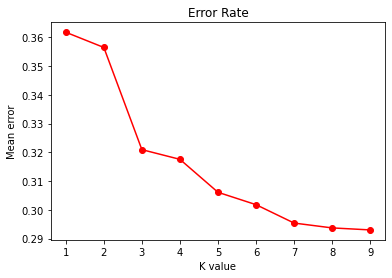

In [28]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    error.append(np.mean(pred_i!=ytest))
plt.plot(range(1,10),error,color='red',marker='o')
plt.title("Error Rate")
plt.xlabel("K value")
plt.ylabel("Mean error")

print('Minimum error',min(error),"at K=",error.index(min(error))+1)

In [29]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [30]:
ypred=classifier.predict(xtest)
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm=confusion_matrix(ytest,ypred)
cm

array([[6365, 2399],
       [2640, 5792]], dtype=int64)

In [32]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.7069667364503373


In [33]:
from sklearn.svm import SVC

In [34]:
sc=SVC(kernel='linear')

In [35]:
sc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [36]:
y_pred=sc.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm=confusion_matrix(ytest,y_pred)
cm

array([[7075, 1689],
       [3081, 5351]], dtype=int64)

In [38]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7226099092812281


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = RandomForestClassifier(n_estimators = 100)

In [51]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [52]:
y_pred = clf.predict(xtest)

In [49]:
metrics.accuracy_score(y_pred,ytest)

0.7002791346824843

clf.save_model("heartmodelRFC.h5")

In [7]:
import joblib

In [53]:
joblib.dump(sc, "svc_heart.joblib")

['svc_heart.joblib']

loaded_rf = joblib.load("./random_forest.joblib")

In [13]:
data.iloc[10]

AGE                   62
GENDER                 1
HEIGHT               169
WEIGHT                80
AP_HIGH              120
AP_LOW                80
CHOLESTEROL            1
GLUCOSE                1
SMOKE                  0
ALCOHOL                0
PHYSICAL_ACTIVITY      1
CARDIO_DISEASE         0
Name: 10, dtype: int64

In [ ]:
56	1	170	72	120	80	2	1	0	0	1	

In [9]:
loaded_rf = joblib.load("svc_heart.joblib")

In [15]:
loaded_rf.predict([[56,1,170,72,120,80,2,1,0,0,1]])

array([1], dtype=int64)